In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature

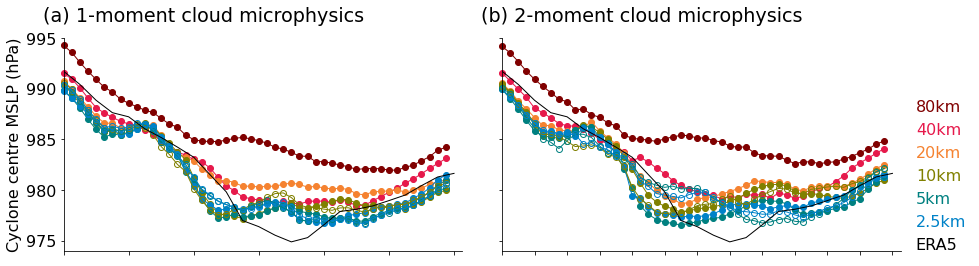

In [9]:
def colordictionary():
    # manually defined colors
    mymaroon= np.array([128,   0,   0])/255
    myred   = np.array([230,  25,  75])/255
    myorange= np.array([245, 130,  48])/255
    mymagenta=np.array([240, 50, 230 ])/255
    myolive = np.array([128, 128,   0])/255
    myteal  = np.array([  0, 128, 128])/255
    myblue  = np.array([  0, 130, 200])/255
    mynavy  = np.array([  0,   0, 128])/255

    return {'80km': mymaroon, '40km': myred, '20km': myorange, '10km': myolive, '5km': myteal, '2km': myblue}
colors=colordictionary()

#########################################################################################################
fig=plt.figure(figsize=(15,9))
plt.rcParams.update({'font.size': 16})
plt.subplots_adjust(hspace = 0.3, wspace=0.1)

########################################################1-moment########################

###########################################################mslp#########################

path='/mnt/lustre01/pf/b/b380459/wcb-vladiana/'
pres1=xr.open_dataset(path+'nawdexnwp-80km-mis-0001_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres2=xr.open_dataset(path+'nawdexnwp-40km-mis-0001_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres3=xr.open_dataset(path+'nawdexnwp-20km-mis-0001_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres4=xr.open_dataset(path+'nawdexnwp-10km-mis-0001_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres5=xr.open_dataset(path+'nawdexnwp-5km-mis-0001_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres6=xr.open_dataset(path+'nawdexnwp-2km-mis-0003_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres7=xr.open_dataset(path+'nawdexnwp-10km-mis-0003_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres8=xr.open_dataset(path+'nawdexnwp-5km-mis-0003_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres9=xr.open_dataset(path+'nawdexnwp-2km-mis-0001_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
###############################################################

ax = fig.add_subplot(221)

ax.plot(pres1.time,pres1.pres_msl_min_filtered/100,linewidth=1,marker='o', label='80km', color=colors['80km'], clip_on=False)
ax.plot(pres2.time,pres2.pres_msl_min_filtered/100,linewidth=1,marker='o', label='40km', color=colors['40km'], clip_on=False)
ax.plot(pres3.time,pres3.pres_msl_min_filtered/100,linewidth=1,marker='o', label='20km', color=colors['20km'], clip_on=False)
ax.plot(pres4.time,pres4.pres_msl_min_filtered/100,linewidth=1,marker='o', label='10km', color=colors['10km'], clip_on=False)
ax.plot(pres5.time,pres5.pres_msl_min_filtered/100,linewidth=1,marker='o', label='5km', color=colors['5km'], clip_on=False)
ax.plot(pres6.time,pres6.pres_msl_min_filtered/100,linewidth=1,marker='o', label='2.5km', color=colors['2km'], clip_on=False)
ax.plot(pres7.time,pres7.pres_msl_min_filtered/100,linewidth=1,marker='o',  markerfacecolor='None',color=colors['10km'], clip_on=False)
ax.plot(pres8.time,pres8.pres_msl_min_filtered/100,linewidth=1,marker='o',  markerfacecolor='None',color=colors['5km'], clip_on=False)
ax.plot(pres9.time,pres9.pres_msl_min_filtered/100,linewidth=1,marker='o',  markerfacecolor='None',color=colors['2km'], clip_on=False)

hour=np.arange(0,49,2)
mslp_era5=np.load('/work/bb1018/b380723/figures/large_scale/mslp_era5.npy')
ax.plot(hour,mslp_era5,linewidth=1,color='black',label='ERA5')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,49)
plt.xticks(np.arange(0,49.1,8))
plt.ylim(974,995)
plt.yticks(np.arange(975,995.1,5))
ax.axes.xaxis.set_ticklabels([])

ax.set_ylabel("Cyclone centre MSLP (hPa)")

plt.title('(a) 1-moment cloud microphysics',x=0.35,y=1.05)


###################################################2moment#################################

###############################mslp############################################
path='/mnt/lustre01/pf/b/b380459/wcb-vladiana/'
pres1=xr.open_dataset(path+'nawdexnwp-80km-mis-0002_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres2=xr.open_dataset(path+'nawdexnwp-40km-mis-0002_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres3=xr.open_dataset(path+'nawdexnwp-20km-mis-0002_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres4=xr.open_dataset(path+'nawdexnwp-10km-mis-0002_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres5=xr.open_dataset(path+'nawdexnwp-5km-mis-0002_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres6=xr.open_dataset(path+'nawdexnwp-2km-mis-0004_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres7=xr.open_dataset(path+'nawdexnwp-10km-mis-0004_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres8=xr.open_dataset(path+'nawdexnwp-5km-mis-0004_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
pres9=xr.open_dataset(path+'nawdexnwp-2km-mis-0002_vladiana_cyclonepressure.nc').sel(time=slice("2016-09-22T12:00:00.000000000", "2016-09-24T11:00:00.000000000", 2)).assign_coords(time=np.arange(0,48,1))
###############################################################

ax = fig.add_subplot(222)

ax.plot(pres1.time,pres1.pres_msl_min_filtered/100,linewidth=1,marker='o', label='80km', color=colors['80km'], clip_on=False)
ax.plot(pres2.time,pres2.pres_msl_min_filtered/100,linewidth=1,marker='o', label='40km', color=colors['40km'], clip_on=False)
ax.plot(pres3.time,pres3.pres_msl_min_filtered/100,linewidth=1,marker='o', label='20km', color=colors['20km'], clip_on=False)
ax.plot(pres4.time,pres4.pres_msl_min_filtered/100,linewidth=1,marker='o', label='10km', color=colors['10km'], clip_on=False)
ax.plot(pres5.time,pres5.pres_msl_min_filtered/100,linewidth=1,marker='o', label='5km', color=colors['5km'], clip_on=False)
ax.plot(pres6.time,pres6.pres_msl_min_filtered/100,linewidth=1,marker='o', label='2.5km', color=colors['2km'], clip_on=False)
ax.plot(pres7.time,pres7.pres_msl_min_filtered/100,linewidth=1,marker='o',  markerfacecolor='None',color=colors['10km'], clip_on=False)
ax.plot(pres8.time,pres8.pres_msl_min_filtered/100,linewidth=1,marker='o',  markerfacecolor='None',color=colors['5km'], clip_on=False)
ax.plot(pres9.time,pres9.pres_msl_min_filtered/100,linewidth=1,marker='o',  markerfacecolor='None',color=colors['2km'], clip_on=False)

hour=np.arange(0,49,2)
mslp_era5=np.load('/work/bb1018/b380723/figures/large_scale/mslp_era5.npy')
ax.plot(hour,mslp_era5,linewidth=1,color='black',label='ERA5')

leg = plt.legend(bbox_to_anchor=(0.97,0.78), handlelength=0, markerscale=0, frameon=False)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,49)
plt.xticks(np.arange(0,49.1,4))
plt.ylim(974,995)
plt.yticks(np.arange(975,995.1,5))
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

plt.title('(b) 2-moment cloud microphysics',x=0.35,y=1.05)


plt.show()